# <center> Identify Customer Segments- Machine Learning </center>

## Table of Contents

1. <a href="#Intro">Introduction</a>
2. <a href="#Trans">Feature Transformation</a>
    * <a href="#Scale"> 2.1 - Apply Feature Scaling </a>
    * <a href="#Dimen"> 2.2 - Perform Dimensionality Reduction </a>
    * <a href="#Inter"> 2.3 - Interpret Principal Components </a>
3. <a href="#Clust">Clustering </a>
    * <a href="#Gener"> 3.1 - Apply Clustering to General Population </a>
    * <a href="#Custo"> 3.2 - Apply All Steps to the Customer Data </a>
    * <a href="#Compa"> 3.3 - Compare Customer Data to Demographics Data </a>

<a id = 'Intro'></a>
## Introduction

Based on the [data cleansing](http://localhost:8888/notebooks/Identify_Customer_Segments_Exploration.ipynb)  notebook, we have a solid understanding of the data under consideration. In this notebook, we load the previously cleaned data then we proceed with the feature transformation as well as the clustering parts of this project. We conclude this analysis by applying the whole pipeline for an another dataset containing the same demographic data about specific customers in a trial of analysing the common patterns associated with the general population. Hopefully, this process will lead to a better understanding of the customer behaviours in shadow of the available data about general population. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from helpers import do_pca, scree_plot, pca_results, map_weights,fit_kmeans,clean_data
from sklearn.cluster import KMeans

<a id = 'Clean'></a>
### 2 -  Load cleaned dataset

The complete data cleaning procedure and detailed justification for each step is given on the [Data Cleansing notebook](http://localhost:8888/notebooks/Identify_Customer_Segments_Exploration.ipynb). For the sake of simplifying this notebook, we just load the resulted dataframe. 

In [2]:
azdias_cleaned = pd.read_csv('Udacity_AZDIAS_Subset_Cleaned.csv', index_col = 0)
azdias_cleaned.head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,x12_8D,x12_9A,x12_9B,x12_9C,x12_9D,x12_9E,x13_O,x13_W,Waelth,LifeStage
1,1.0,1.0,5.0,2.0,5.0,4.0,5.0,3.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0
2,3.0,1.0,4.0,1.0,2.0,3.0,5.0,3.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
4,3.0,4.0,3.0,4.0,1.0,3.0,2.0,3.0,5.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0
5,1.0,3.0,1.0,5.0,2.0,2.0,5.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0
6,2.0,1.0,5.0,1.0,5.0,4.0,3.0,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0


In [3]:
original_feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter = ';')
original_feat_info.index = original_feat_info.attribute
original_feat_info.drop('attribute', axis = 1, inplace = True)

<a id = 'Trans'></a>
## 3 - Feature Transformation

<a id = 'Scale'></a>
### 3.1 -  Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. In this substep, we perform a standard scaling so that all the features have a mean of 0 and a standard deviation of 1. 

In [4]:
# Apply feature scaling to the general population demographics data.
Sclaer_obj = StandardScaler()
azdias2 = pd.DataFrame(Sclaer_obj.fit_transform(azdias_cleaned), columns = azdias_cleaned.columns)

### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

<a id = 'Dimen'></a>
### 3.2 - Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [5]:
# Apply PCA to the data.
pca, X_pca = do_pca(n_components = azdias_cleaned.shape[1], data = azdias2)

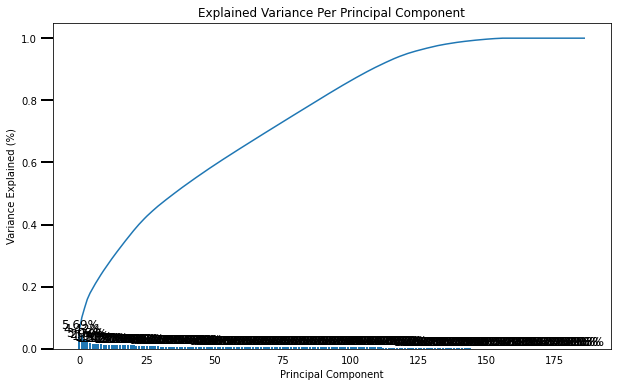

In [6]:
# Investigate the variance accounted for by each principal component.
vals,cumvals = scree_plot(pca)

Having completing the PCA analysis with all features used, we should retain specific number of components to facilitate the upcoming clustering as possible. Thus, we need to keep number of the features which results in explaining specific threshold of the original data's variance.  

In [7]:
# Re-apply PCA to the data while selecting for number of components to retain.
threshold = .8
comp_to_retain = np.where(cumvals <= threshold)[0][-1]
pca, X_pca = do_pca(n_components = comp_to_retain, data = azdias_cleaned)
FinalPCAresults = pca_results(azdias_cleaned, pca)

In [8]:
FinalPCAresults.shape

(87, 188)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

<a id = 'Inter'></a>
### 3.3 -  Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [9]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
weights2 = map_weights(FinalPCAresults, 2)
weights2

x6_1.0     0.3180
x4_1.0     0.2467
x3_1.0     0.2467
x5_1.0     0.2284
x11_9      0.1777
            ...  
x5_9.0    -0.1624
x4_5.0    -0.1836
x9_1.0    -0.1892
x5_10.0   -0.2205
x6_5.0    -0.2205
Name: Dimension 3, Length: 188, dtype: float64

In [10]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
weights3 = map_weights(FinalPCAresults, 3)
weights3

SEMIO_VERT           0.3796
SEMIO_SOZ            0.2875
SEMIO_FAM            0.2736
SEMIO_KULT           0.2501
FINANZ_MINIMALIST    0.1771
                      ...  
FINANZ_ANLEGER      -0.2000
SEMIO_RAT           -0.2374
SEMIO_KRIT          -0.2990
SEMIO_DOM           -0.3483
SEMIO_KAEM          -0.3696
Name: Dimension 4, Length: 188, dtype: float64

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

<a id = 'Clust'></a>
## 4 -  Clustering

<a id = 'Gener'></a>
### 4.1 - Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [11]:
X_pca[0:1000].shape

(1000, 87)

In [12]:
centers_1 = np.arange(20,30)
scores_1 = []
for k in centers_1:
    model = KMeans(n_clusters = k)
    model.fit(X_pca[0:1000])
    scores_1.append(np.abs(model.score(X_pca[0:1000])))

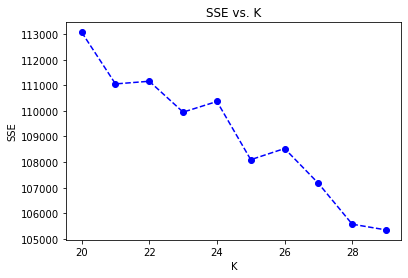

In [13]:
# Investigate the change in within-cluster distance across number of clusters.
plt.plot(centers_1, scores_1, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [14]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
k_best = 25
labels,Kmeans_obj = fit_kmeans(X_pca[0:1000], k_best) #fit kmeans to get the labels

In [15]:
labels

array([ 3, 20,  7,  4, 14, 14, 24,  2,  1,  7, 15,  7, 20, 20,  3,  7, 11,
       11, 20, 19, 19, 10, 11, 22, 21, 20,  4,  0, 14, 17, 14,  4, 19, 16,
       18, 11,  9, 16, 22,  7,  7, 18, 24,  9,  9,  3, 11,  5, 11, 24, 17,
       17,  0, 12, 22, 24, 14, 24,  8, 18,  8, 24, 11,  5, 16, 17, 22, 19,
       14, 14, 16, 17, 15, 20, 10, 20,  9, 18, 17, 18, 18,  7, 17,  3,  4,
       14, 16,  6,  3,  3,  4,  9,  3,  4,  6,  5, 10, 13, 13, 11,  4, 19,
        9,  7, 12, 13, 12, 22,  8, 24,  7, 23,  5, 18,  7,  4,  6, 20, 11,
        6, 18, 17, 18,  8, 17,  4, 23,  8, 18, 23, 18, 10,  2, 14,  9, 20,
        1, 11,  4, 14, 13, 11, 19, 19,  6, 13, 14,  7,  8, 13,  9,  7,  7,
       18, 20, 23,  7,  7, 16, 16, 18,  9,  7,  4,  6, 22,  7, 14, 15, 11,
       22, 20,  9,  9,  2, 17,  5,  9,  9,  9,  6, 24, 19, 24, 20,  1, 19,
        8, 24, 24,  8,  7,  3,  5,  6, 14,  7, 14,  4, 14,  7, 24,  6, 16,
       18,  8, 15, 17, 22,  9,  9, 24, 22, 11,  4,  3, 17,  4,  7, 18,  7,
        9, 18,  7, 20,  2

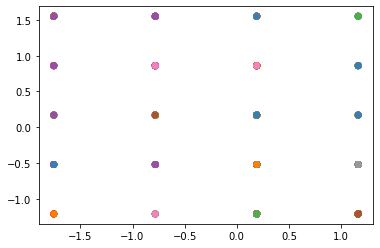

In [16]:
# Plot the original data with clusters
plt.scatter(azdias2['ALTERSKATEGORIE_GROB'].iloc[0:1000], azdias2['FINANZ_ANLEGER'].iloc[0:1000], c=labels, cmap='Set1');

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

<a id = 'Custo'></a>
### 5.2 -  Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [17]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter = ';')

In [18]:
customers.OST_WEST_KZ

0           W
1         NaN
2           W
3           W
4           W
         ... 
191647      W
191648      W
191649      W
191650      W
191651      W
Name: OST_WEST_KZ, Length: 191652, dtype: object

In [19]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_cleaned = clean_data(customers,original_feat_info)
customers_scaled = pd.DataFrame(Sclaer_obj.transform(customers_cleaned), columns = customers_cleaned.columns)

Data cleansing pipeline...
	1-Replacing missing values per column with Nan...
		Replacing done
	2-Removing the outliars columns and rows...
		Removing the outliars columns and rows done
	3-Feature Engineering...


AttributeError: 'DataFrame' object has no attribute 'OST_WEST_KZ'

In [ ]:
customers_scaled

In [ ]:
customers_transformed = pca.transform(customers_scaled)
customers_labels = Kmeans_obj.transform(customers_transformed)

<a id = 'Compa'></a>
### 5.3 - Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.



In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?



In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?



### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.